In [3]:
import shap
import pandas as pd
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", context="notebook", palette="muted")

In [4]:
model_path = "../outputs/models/xgboost_breast_cancer.pkl"
scaler_path = "../outputs/models/scaler.pkl"
data_path = "../data/processed/breast_cancer_clean.csv"

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
df = pd.read_csv(data_path)

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_scaled = scaler.transform(X)

PermutationExplainer explainer: 570it [00:42, 10.22it/s]                                                               
C:\Users\shail\AppData\Local\Temp\ipykernel_16316\2034069927.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


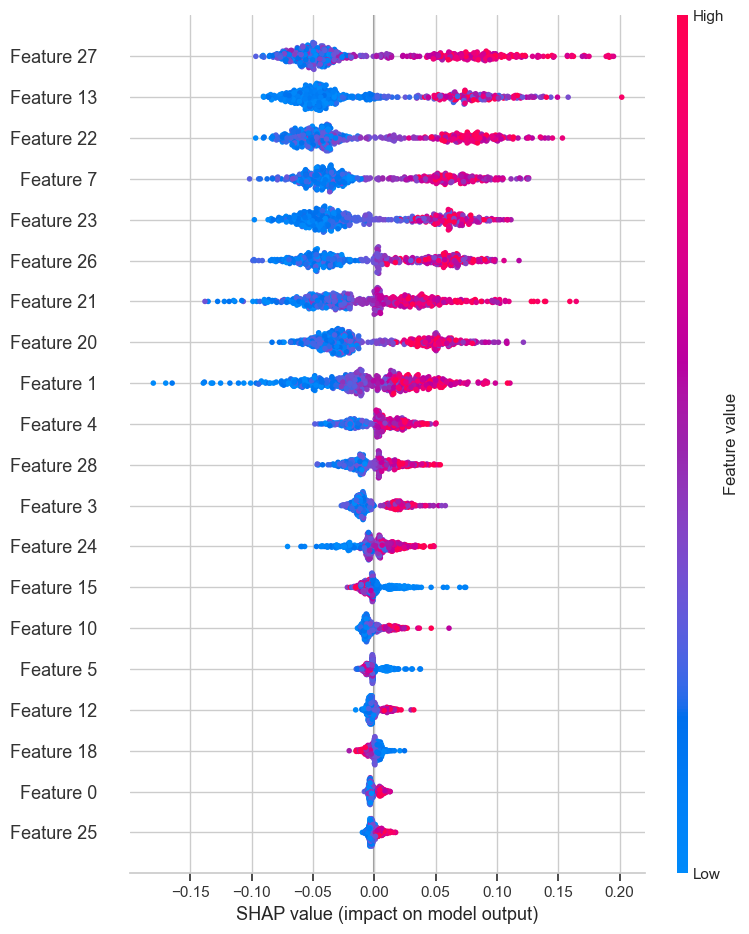

C:\Users\shail\AppData\Local\Temp\ipykernel_16316\2034069927.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="bar")


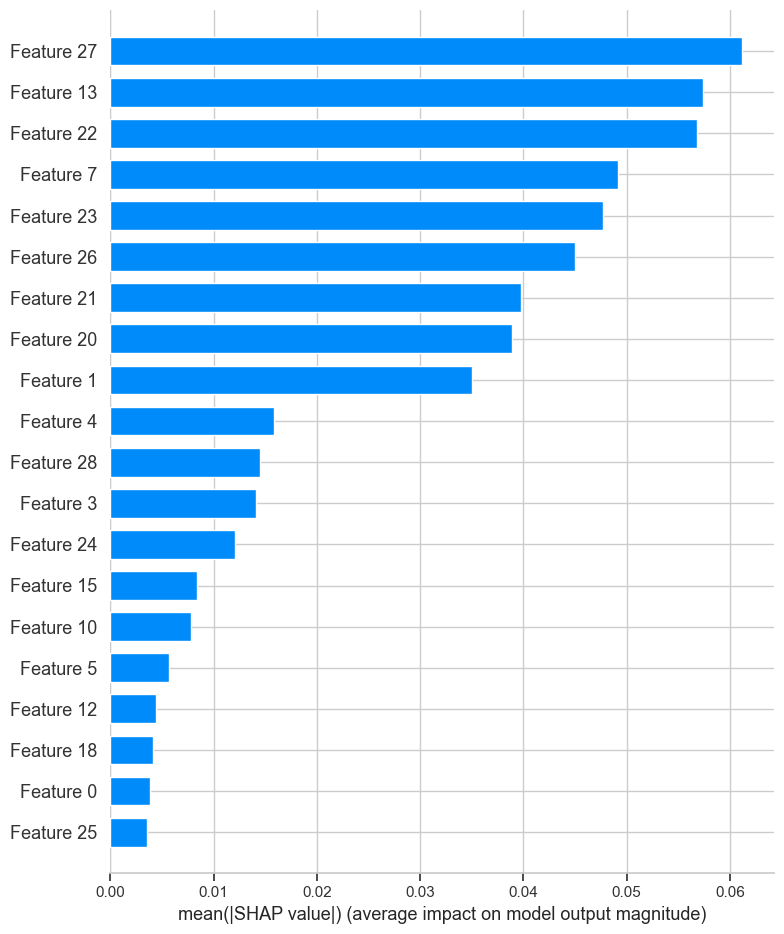

In [10]:
predict_fn = lambda x: model.predict_proba(x)[:,1]
explainer = shap.Explainer(predict_fn, X_scaled)
shap_values = explainer(X_scaled)

shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [15]:
index = 1  #first patient

shap_values_patient = shap_values[index]

shap.initjs()
shap.force_plot(
    base_value=shap_values_patient.base_values,
    shap_values=shap_values_patient.values,
    features=X.iloc[index,:]
)

In [16]:
index = 2  #second patient

shap_values_patient = shap_values[index]

shap.initjs()
shap.force_plot(
    base_value=shap_values_patient.base_values,
    shap_values=shap_values_patient.values,
    features=X.iloc[index,:]
)

In [18]:
index = 5  #fifth patient

shap_values_patient = shap_values[index]

shap.initjs()
shap.force_plot(
    base_value=shap_values_patient.base_values,
    shap_values=shap_values_patient.values,
    features=X.iloc[index,:]
)

In [19]:
np.save("../outputs/figures/shap_values.npy", shap_values.values)